In [1]:
write_over_18 = 0 # set to 1 if you want to write files for patients over 18

In [2]:
import matplotlib.pyplot as plt

In [3]:
# EICU
import pandas as pd
pd.set_option('display.max_colwidth', None)
dir_data_raw = "/Users/rachellehorwitz/Documents/VTAlert/data/raw_eicu/"
dir_data_over18 = "/Users/rachellehorwitz/Documents/VTAlert/data/over18_eicu/"
# admissiondx = pd.read_csv(dir_data_raw + 'admissionDx.csv')
# apachePredVar = pd.read_csv(dir_data_raw + 'apachePredVar.csv')
# diagnosis = pd.read_csv(dir_data_raw + 'diagnosis.csv')
# customLab = pd.read_csv(dir_data_raw + 'customLab.csv')

In [4]:
# Get patientUnitStayIds of patients who are >18 years old
# everything except hospital.csv can be indexed by patientUnitStayID
# patient.csv has age
import glob, os
import pandas as pd
csvfiles = []
for file in glob.glob(dir_data_raw + '*.csv'):
    csvfiles.append(file)
patient = pd.read_csv(dir_data_raw + 'patient.csv')
patient = patient[patient['age'].notna()]
print(str(patient.shape[0]) + ' patients with age not na')

# Patients with age > 89 do not have their actual age. They are just listed as '> 89'
# In MIMIC, it was known that the median age of patients > 89 was 91. Use that value here
over89 = patient[patient['age']=='> 89']
print(str(over89.shape[0]) + ' patients with age > 89')
patient['age'] = patient['age'].replace('> 89', '91').astype(int)
patientOver18 = patient[patient['age'] > 18]
print(str(patientOver18.shape[0]) + ' patients with age > 18')
patientUnitStayIdOver18 = list(patientOver18['patientunitstayid'])

200764 patients with age not na
7081 patients with age > 89
199702 patients with age > 18


In [5]:
import sys
sys.path.insert(0, '/Users/rachellehorwitz/Documents/VTAlert/src')
if write_over_18 == 1:
    from rewrite_patientsOver18 import *
    dir_write_to = '/Users/rachellehorwitz/Documents/tmp/' #dir_data_over18
    keepPtsOver18(csvfiles, patientUnitStayIdOver18, dir_write_to, dir_data_raw)

In [6]:
admissiondx = pd.read_csv(dir_data_over18 + 'admissiondx.csv')
diagnosis = pd.read_csv(dir_data_over18 + 'diagnosis.csv')

In [7]:
admissiondx.head(30)

,admissiondxid,patientunitstayid,admitdxenteredoffset,admitdxpath,admitdxname,admitdxtext
0,8023778,2900217,62,admission diagnosis|Operative Organ Systems|Organ System|Cardiovascular,Cardiovascular,Cardiovascular
1,8023777,2900217,62,admission diagnosis|Was the patient admitted from the O.R. or went to the O.R. within 4 hours of admission?|Yes,Yes,Yes
2,8023779,2900217,62,admission diagnosis|All Diagnosis|Operative|Diagnosis|Cardiovascular|Aortic and Mitral valve replacement,Aortic and Mitral valve replacement,Aortic and Mitral valve replacement
3,7929318,2900240,53,admission diagnosis|Non-operative Organ Systems|Organ System|Gastrointestinal,Gastrointestinal,Gastrointestinal
4,7929317,2900240,53,admission diagnosis|Was the patient admitted from the O.R. or went to the O.R. within 4 hours of admission?|No,No,No
5,7929319,2900240,53,"admission diagnosis|All Diagnosis|Non-operative|Diagnosis|Gastrointestinal|Bleeding, GI-location unknown","Bleeding, GI-location unknown","Bleeding, GI-location unknown"
6,7912438,2900262,6,"admission diagnosis|All Diagnosis|Non-operative|Diagnosis|Cardiovascular|Infarction, acute myocardial (MI)","Infarction, acute myocardial (MI)","Infarction, acute myocardial (MI)"
7,7912437,2900262,6,admission diagnosis|Non-operative Organ Systems|Organ System|Cardiovascular,Cardiovascular,Cardiovascular
8,7912439,2900262,6,admission diagnosis|Additional APACHE Information|Acute MI location|anterior,anterior,anterior
9,7912440,2900262,6,admission diagnosis|Additional APACHE Information|Thrombolytic Therapy received within 24 hours|No,No,No


In [8]:
print('there are ' + str(diagnosis.shape[0]) +  ' diagnosis entries')
diagnosis.head(10)

there are 2703008 diagnosis entries


,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
0,4222318,141168,False,72,cardiovascular|chest pain / ASHD|coronary artery disease|known,"414.00, I25.10",Other
1,3370568,141168,True,118,cardiovascular|ventricular disorders|cardiomyopathy,NaN,Other
2,4160941,141168,False,72,pulmonary|disorders of the airways|COPD,"491.20, J44.9",Other
3,4103261,141168,True,118,pulmonary|disorders of the airways|COPD,"491.20, J44.9",Other
4,3545241,141168,True,118,cardiovascular|ventricular disorders|congestive heart failure,"428.0, I50.9",Other
5,3820204,141168,True,118,cardiovascular|arrhythmias|atrial fibrillation|with hemodynamic compromise,"427.31, I48.0",Primary
6,3656305,141168,True,118,renal|disorder of kidney|chronic kidney disease,"585.9, N18.9",Other
7,3955157,141168,True,118,cardiovascular|chest pain / ASHD|coronary artery disease|known,"414.00, I25.10",Other
8,3827059,141168,False,72,cardiovascular|ventricular disorders|congestive heart failure,"428.0, I50.9",Other
9,3743877,141168,False,72,cardiovascular|ventricular disorders|cardiomyopathy,NaN,Other


In [9]:
diagnosis = diagnosis[diagnosis['icd9code'].notna()]
print('there are ' + str(diagnosis.shape[0]) +  ' diagnosis entries with non-nan icd9codes')
diagnosis.head(5)

there are 2272336 diagnosis entries with non-nan icd9codes


,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
0,4222318,141168,False,72,cardiovascular|chest pain / ASHD|coronary artery disease|known,"414.00, I25.10",Other
2,4160941,141168,False,72,pulmonary|disorders of the airways|COPD,"491.20, J44.9",Other
3,4103261,141168,True,118,pulmonary|disorders of the airways|COPD,"491.20, J44.9",Other
4,3545241,141168,True,118,cardiovascular|ventricular disorders|congestive heart failure,"428.0, I50.9",Other
5,3820204,141168,True,118,cardiovascular|arrhythmias|atrial fibrillation|with hemodynamic compromise,"427.31, I48.0",Primary


In [15]:
from icd9codes import *
icd9_vte = getVTEicd9codes()

In [16]:
icd9_vte

['415.1', '415.10', '415.11', '415.13', '415.19', '453.4', '453.89']

In [17]:
diagnosis_vte = pd.DataFrame()
for code in icd9_vte:
    print(str(code))
    rows = diagnosis[diagnosis['icd9code'].str.contains(code)]
    diagnosis_vte = pd.concat([rows, diagnosis_vte])
    diagnosis_vte = diagnosis_vte.loc[~diagnosis_vte.index.duplicated(keep='first')]

415.1
415.10
415.11
415.13
415.19
453.4
453.89


In [18]:
diagnosis_vte.shape

(9840, 7)

In [19]:
diagnosis_vte.head(30)

,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
483,3690912,141923,True,14,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Major
641,4107797,142195,True,69,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Primary
642,4220426,142195,False,9,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Primary
654,3462813,142266,True,9,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Primary
805,4000422,142561,True,113,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Primary
1336,4112258,143466,True,7279,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Other
2185,3467842,145030,True,696,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Primary
2193,3761111,145030,False,267,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Primary
2975,3559435,146281,False,770,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Other
2976,3880492,146281,True,1090,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Primary


<IPython.core.display.Javascript object>


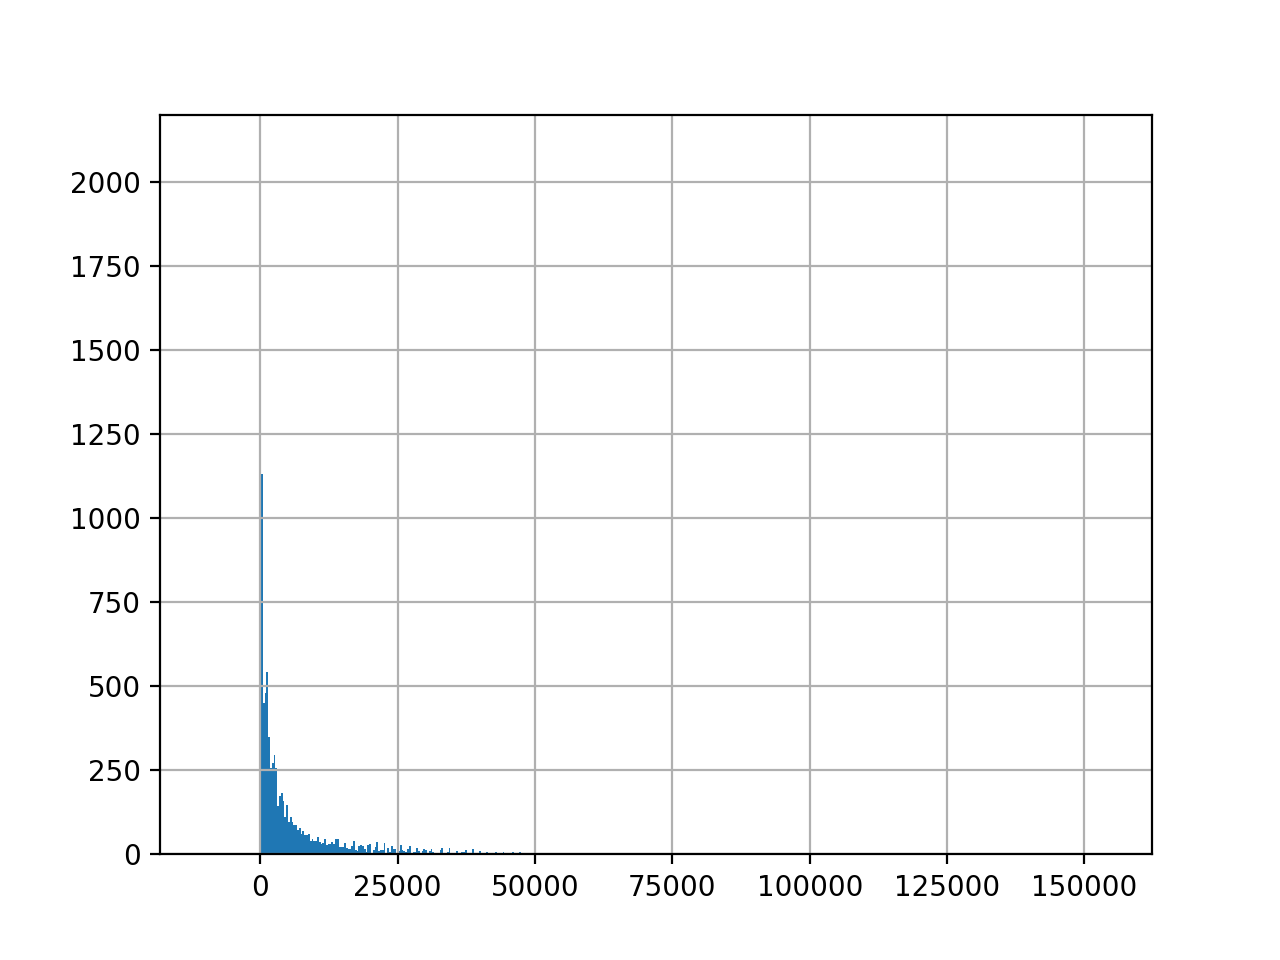

In [20]:
%matplotlib notebook
diagnosis_vte['diagnosisoffset'].hist(bins=500)

In [21]:
import numpy as np
# Don't look at patients who are entering the ICU for PE/DVT, so threshold by time
time_thresh = 24*60
vte_greaterThanTime = diagnosis_vte[diagnosis_vte['diagnosisoffset']>=time_thresh]
vte_lessThanTime = diagnosis_vte[diagnosis_vte['diagnosisoffset']<time_thresh]
print(str(vte_greaterThanTime.shape[0]) + ' visits are included for time_thresh=' + str(time_thresh))
print(str(vte_lessThanTime.shape[0]) + ' visits are eliminated for time_thresh=' + str(time_thresh))

# Look for duplicates in patientunitstayid in vte_greaterThanTime and vte_lessThanTime to see if some people were diagnosed more than once
u_vte_greaterThanTime_patientunitstayid = vte_greaterThanTime['patientunitstayid'].unique()
print(str(u_vte_greaterThanTime_patientunitstayid.shape[0]) + ' unique patientunitstayids in greaterThanTime')
u_vte_lessThanTime_patientunitstayid = vte_lessThanTime['patientunitstayid'].unique()
print(str(u_vte_lessThanTime_patientunitstayid.shape[0]) + ' unique patientunitstayids in lessThanTime')
type(u_vte_lessThanTime_patientunitstayid)
patientunitstayid_intersect = np.intersect1d(u_vte_greaterThanTime_patientunitstayid, u_vte_lessThanTime_patientunitstayid)
print(str(patientunitstayid_intersect.shape[0]) + ' patientunitstayids in both')

# Eliminate patients who had VTE diagnosed shortly after they were admitted to the ICU
diagnosis_vte_eliminateLessThan = diagnosis_vte \
                                [~diagnosis_vte['patientunitstayid'].isin(u_vte_lessThanTime_patientunitstayid)]
diagnosis_vte_eliminateLessThan.head(10)

5116 visits are included for time_thresh=1440
4724 visits are eliminated for time_thresh=1440
1002 unique patientunitstayids in greaterThanTime
2464 unique patientunitstayids in lessThanTime
750 patientunitstayids in both


,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
1336,4112258,143466,True,7279,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Other
8307,4191729,153993,False,4420,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Other
8310,4113847,153993,False,4984,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Major
8353,3929827,153993,False,3185,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Other
8356,4021454,153993,False,6328,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Major
8370,3468561,153993,True,10749,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Major
8371,4079879,153993,False,4983,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Other
8374,4100478,153993,False,3186,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Other
8525,4271939,154134,False,1874,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Other
8536,3650956,154134,False,3472,pulmonary|disorders of vasculature|pulmonary embolism,"415.19, I26.99",Other


In [22]:
# Eliminate patientunitstayids who were diagnosed with DVT upon admission to ICU
dvt_admissiondx = admissiondx[admissiondx['admitdxname'].str.contains('Thrombosis, vascular', case=False)]
patientunitstayid_dvt_admission = dvt_admissiondx['patientunitstayid'].unique()

# Take union(patientunitstayids diagnosed with DVT upon admission to ICU ||
#.           patientunitstayids diagnosed with DVT shortly after ICU admission (within time_thresh))
patientunitstayid_dvt_too_early = np.union1d(u_vte_lessThanTime_patientunitstayid, patientunitstayid_dvt_admission)
patientunitstayid_dvt_too_early.shape[0]

2906

In [ ]:
# Re-write csv files, elimiating patientunitstayid_dvt_too_early
def eliminatePtsWithVTETooEarly(csvfiles, patientUnitStayID_eliminate, dir_write, dir_read):
  import pandas as pd
  import os
  #csvfiles.remove(dir_data_raw + 'hospital.csv') # no patientunitstayid
  for csvfile in csvfiles:
      print('------')
      print('Working on ' + csvfile)
      data_in = pd.read_csv(csvfile)
      data_out = data_in[~data_in['patientunitstayid'].isin(patientunitstayid_dvt_too_early)]
      base = os.path.basename(csvfile)
      print(base)
      newFileNameWithPath = dir_write + base
      data_out.to_csv(newFileNameWithPath, index=False)
      print('Saved data to ' + newFileNameWithPath)
      print('------')

csvfiles = []
for file in glob.glob(dir_data_over18 + '*.csv'):
    csvfiles.append(file)
dir_write = '/Users/rachellehorwitz/Documents/VTAlert/data/over18_no_vte_tooearly/'
eliminatePtsWithVTETooEarly(csvfiles, patientunitstayid_dvt_too_early, dir_write, dir_data_over18)